# Pendahuluan

Dari data yang tersedia akan digunakan untuk melihat bisnis makanan yang ada di LA dan informasi yang bisa didapatkan dari data.

# Inisialisasi

In [1]:
# Memuat library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import usaddress

In [2]:
# Menampilkan semua kolom
pd.set_option('display.max_columns', None)

# Lebar kolom max
pd.set_option('display.max_colwidth', None)

# Memuat data

In [3]:
try :
    data = pd.read_csv(r'C:\Users\vidop\Documents\Practicum\Sprint 9\File\rest_data_us.csv')

except :
    data = pd.read_csv('/datasets/rest_data_us.csv')
    

# Memeriksa dan memperbaiki data

## Memeriksa data

In [4]:
# Memeriksa data
na = data.isna().sum().sum()
dup = data.duplicated().sum()
print('Data memiliki baris dan kolom :', data.shape)
print()
if na > 0 :
    print('Data memiliki nilai yang hilang pada kolom :')
    print(data.isna().sum())
else :
    print('Tidak terdapat nilai yang hilang pada data')
print()
if dup > 0 :
    print('Data memiliki duplikat eksplisit sebesar', dup, 'baris')
else : 
    print('Tidak terdapat duplikat eksplisit dalam data')
print()
print(data.info())
print()
print(data.describe())
print()
print(data.head())


Data memiliki baris dan kolom : (9651, 6)

Data memiliki nilai yang hilang pada kolom :
id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

Tidak terdapat duplikat eksplisit dalam data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB
None

                 id       number
count   9651.000000  9651.000000
mean   16611.000000    43.695161
std     2786.148058    47.622874
min    11786.000000     1.000000
25%    14198.500000    14.000000
50%    16611.000000    27.000000
75%    19023.500000    46.0

**Informasi yang terdapat dalam data :**

- object_name — nama usaha.
- chain — TRUE = Waralaba, FALSE = Non Waralaba.
- object_type — jenis usaha.
- address — alamat.
- number — jumlah kursi.

**Masalah pada data :**

1. Terdapat nilai yang hilang pada kolom chain.

## Memperbaiki data

In [5]:
# Memeriksa data dengan chain Na
data.query('chain.isna()')

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


In [6]:
# Menghitung persentase baris data chain  Na

(len(data.query('chain.isna()')) / len(data)) * 100

0.031084861672365557

Terdapat 3 baris data dengan nilai chain yang hilang, sekitar 0.03% dari total baris data. Data ini akan dihapus.

In [7]:
# Memfilter data tanpa nilai chain yang hilang
data = data[~data['chain'].isna()]

In [8]:
# Cek kembali nilai yang hilang**Informasi yang terdapat dalam data :**

data.isna().sum()

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64

Sudah tidak terdapat nilai yang hilang dalam data.

## Kesimpulan

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9648 non-null   int64 
 1   object_name  9648 non-null   object
 2   address      9648 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9648 non-null   object
 5   number       9648 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 527.6+ KB


Jumlah baris data berubah dari 9.651 menjadi 9.648.

**Informasi yang terdapat dalam data :**

- object_name — nama usaha.
- chain — TRUE = Waralaba, FALSE = Non Waralaba.
- object_type — jenis usaha.
- address — alamat.
- number — jumlah kursi.

**Masalah pada data :**

1. Terdapat nilai yang hilang pada kolom chain.

**Perbaikan pada data :**

1. Menghapus data chain dengan nilai na.

# Eksplorasi data

## Jenis Usaha

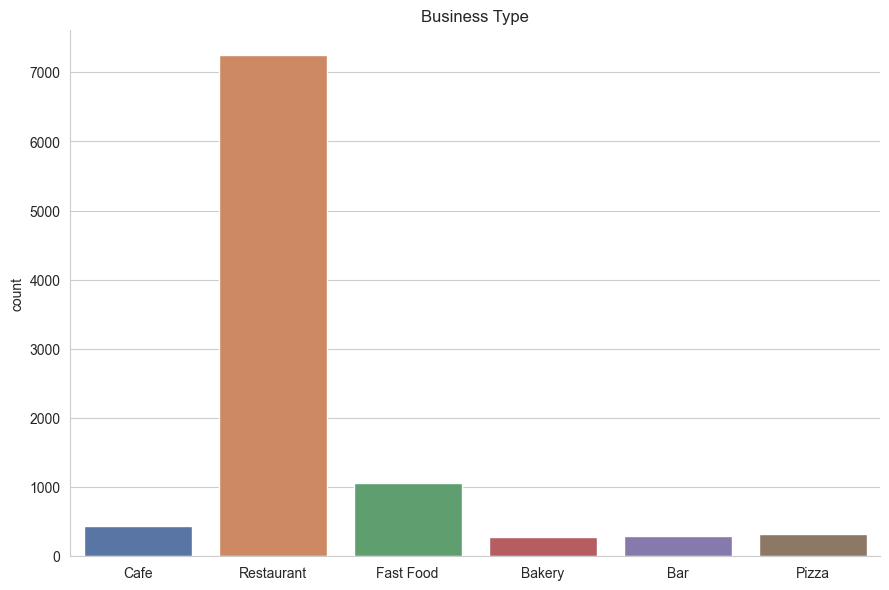

In [10]:
# Grafik bar seaborn
sns.set_style('whitegrid')
btype = sns.catplot(data=data, x='object_type', kind='count', palette='deep', height=6, aspect=1.5)
btype.set(title = 'Business Type', xlabel='')


Secara keseluruhan jenis usaha Restaurant berjumlah paling banyak dan Bakery berjumlah paling sedikit.

In [11]:
# Membuat table data jenis usaha keseluruhan
btype_table = data.groupby('object_type')['id'].count().sort_values(ascending=False).reset_index()
btype_table.columns = ['business_type', 'count']

btype_table

,business_type,count
0,Restaurant,7253
1,Fast Food,1066
2,Cafe,435
3,Pizza,319
4,Bar,292
5,Bakery,283


3 Jenis usaha terbanyak adalah Restaurant, Fast Food dan Cafe.

In [12]:
# Export data ke excel
btype_table.to_excel(r'C:\Users\vidop\Documents\Practicum\Sprint 9\Export\btype_table.xlsx',
                    index=False)

## Jenis Usaha Waralaba

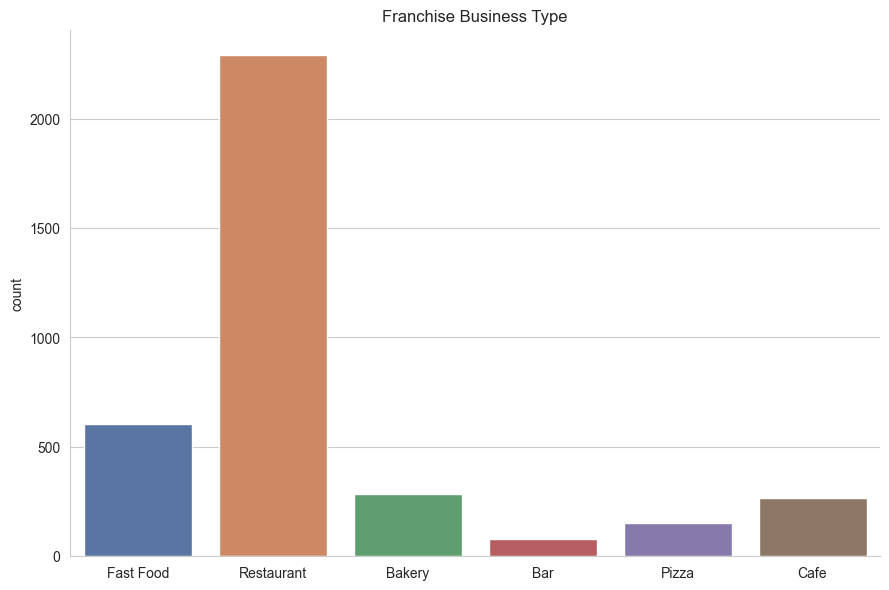

In [13]:
# Grafik bar seaborn
f_btype = sns.catplot(data=data[data['chain'] == True], x='object_type', kind='count', palette='deep', height=6, aspect=1.5)
f_btype.set(title = 'Franchise Business Type', xlabel='')

Pada bisnis Waralaba, jenis usaha Restaurant berjumlah paling banyak dan Bar paling sedikit.

In [14]:
# Membuat table data jenis usaha waralaba
f_btype_table = data[data['chain'] == True].groupby('object_type')['id'].count().sort_values(ascending=False).reset_index()
f_btype_table.columns = ['business_type', 'count']

f_btype_table

,business_type,count
0,Restaurant,2292
1,Fast Food,605
2,Bakery,283
3,Cafe,266
4,Pizza,153
5,Bar,77


3 jenis usaha waralaba terbanyak adalah Restaurant, Fast Food dan Bakery.

In [15]:
# Export data ke excel
f_btype_table.to_excel(r'C:\Users\vidop\Documents\Practicum\Sprint 9\Export\f_btype_table.xlsx',
                    index=False)

## Jenis Usaha Non-Waralaba

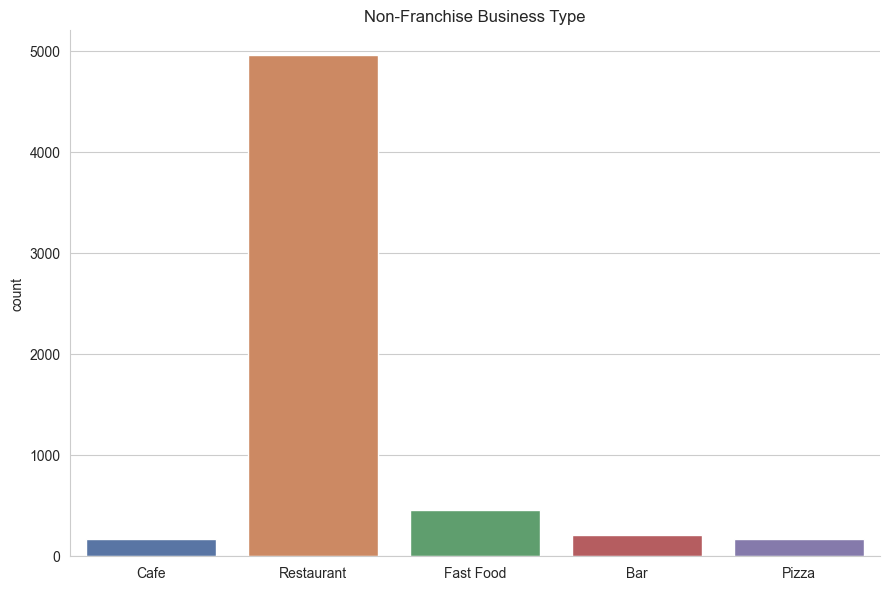

In [16]:
# Grafik bar seaborn
f_btype = sns.catplot(data=data[data['chain'] == False], x='object_type', kind='count', palette='deep', height=6, aspect=1.5)
f_btype.set(title = 'Non-Franchise Business Type', xlabel='')

Pada bisnis non-waralaba, jenis usaha Restaurant berjumlah paling banyak dan Pizza paling sedikit.

In [17]:
# Membuat table data jenis usaha non-waralaba
nf_btype_table = data[data['chain'] == False].groupby('object_type')['id'].count().sort_values(ascending=False).reset_index()
nf_btype_table.columns = ['business_type', 'count']

nf_btype_table

,business_type,count
0,Restaurant,4961
1,Fast Food,461
2,Bar,215
3,Cafe,169
4,Pizza,166


3 jenis usaha non-waralaba terbanyak adalah Restaurant, Fast Food dan Bar.

In [18]:
# Export data ke excel
nf_btype_table.to_excel(r'C:\Users\vidop\Documents\Practicum\Sprint 9\Export\nf_btype_table.xlsx',
                    index=False)

## Perbandingan Kepemilikan Jenis Usaha Waralaba dan Non-Waralaba

In [19]:
# Membuat tabel perbandingan 
comp_table = f_btype_table.merge(nf_btype_table, left_on='business_type', right_on='business_type', how='outer',
                                suffixes=('_franchise', '_non_franchise')).fillna(0)

comp_table = comp_table.merge(btype_table, left_on='business_type', right_on='business_type', how='outer')

comp_table['count_non_franchise'] = comp_table['count_non_franchise'].astype('int')

comp_table = comp_table.rename(columns={'count':'total'})

# Menghitung persentase waralaba tiap jenis usaha
comp_table['franchise_pct'] = round((comp_table['count_franchise'] / comp_table['total'])*100)

comp_table = comp_table.sort_values('franchise_pct', ascending=False)

comp_table

,business_type,count_franchise,count_non_franchise,total,franchise_pct
2,Bakery,283,0,283,100.0
3,Cafe,266,169,435,61.0
1,Fast Food,605,461,1066,57.0
4,Pizza,153,166,319,48.0
0,Restaurant,2292,4961,7253,32.0
5,Bar,77,215,292,26.0


Jenis usaha Bakery tampaknya memiliki kepemilikian bisnis waralaba 100%, tidak ada kepemilikan non-waralaba di jenis usaha ini.

Jenis usaha Bar memiliki persentase kepemilikan bisnis waralaba terkecil sebesar 26%.

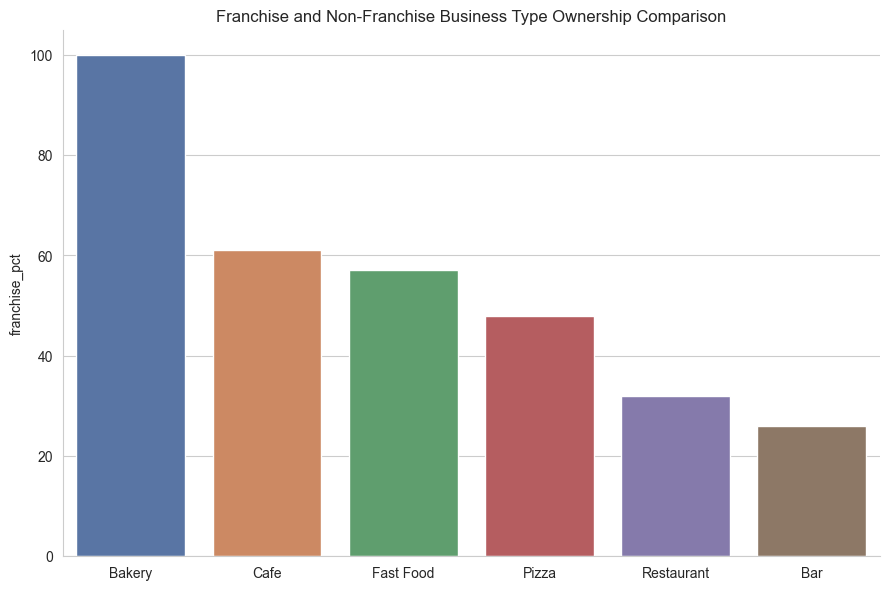

In [20]:
# Grafik bar seaborn
comp_btype = sns.catplot(data=comp_table, x='business_type', y='franchise_pct',
                         kind='bar', palette='deep', height=6, aspect=1.5)
comp_btype.set(title = 'Franchise and Non-Franchise Business Type Ownership Comparison', xlabel='')


Bisnis waralaba paling banyak pada jenis usaha Bakery dan paling sedikit pada Bar.

In [21]:
# Export data ke excel
comp_table.to_excel(r'C:\Users\vidop\Documents\Practicum\Sprint 9\Export\comp_table.xlsx',
                    index=False)

## Ciri-ciri Usaha Waralaba

In [22]:
# Menghitung rata-rata jumlah lokasi dan kursi
loc_seat = data.pivot_table(index=['chain', 'object_name'], values=['address', 'number'], 
                    aggfunc={'address':'count', 'number':'sum'}).reset_index()

loc_seat_avg= round(loc_seat.groupby('chain').agg(avg_location=('address','mean'),
                                                  avg_seat=('number','mean')).reset_index(),2)

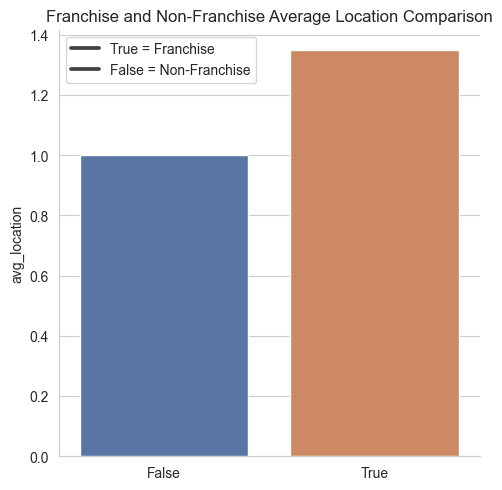

In [23]:
# Grafik batang avg location
loc_comp = sns.catplot(data=loc_seat_avg, y='avg_location', x='chain', kind='bar', palette='deep')
loc_comp.set(title = 'Franchise and Non-Franchise Average Location Comparison', xlabel='')

plt.legend(labels=['True = Franchise', 'False = Non-Franchise'])
plt.show(loc_comp)

Secara keseluruhan bisnis waralaba memiliki lebih banyak lokasi.

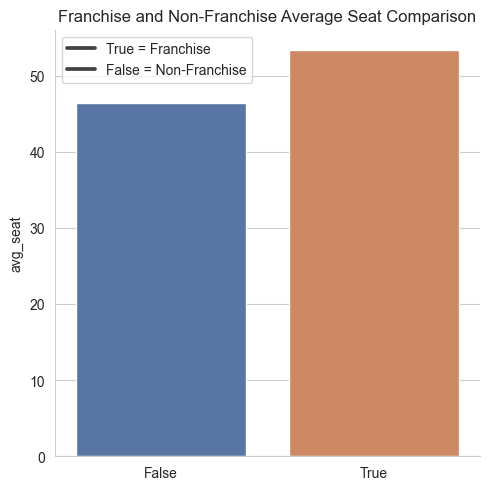

In [24]:
# Grafik batang avg seat
loc_comp = sns.catplot(data=loc_seat_avg, y='avg_seat', x='chain', kind='bar', palette='deep')
loc_comp.set(title = 'Franchise and Non-Franchise Average Seat Comparison', xlabel='')

plt.legend(labels=['True = Franchise', 'False = Non-Franchise'])
plt.show(loc_comp)

Secara keseluruhan bisnis waralaba memiliki lebih banyak jumlah kursi.

In [25]:
# Perbandingan keduanya
loc_seat_avg

,chain,avg_location,avg_seat
0,False,1.00,46.40
1,True,1.35,53.39


Secara keseluruhan jenis usaha, bisnis waralaba memiliki jumlah lokasi dan kursi lebih banyak daripada bisnis non-waralaba.

In [26]:
# Export data ke excel
loc_seat_avg.to_excel(r'C:\Users\vidop\Documents\Practicum\Sprint 9\Export\loc_seat.xlsx',
                    index=False)

## Rata-rata Jumlah Kursi Jenis Usaha

In [27]:
# Membuat tabel jumlah rata-rata kursi tiap jenis usaha 
seat_avg_table = round(data.pivot_table(index='object_type',
                                        values='number', aggfunc='mean'),2).reset_index()

seat_avg_table = seat_avg_table.sort_values(by='number', ascending=False)

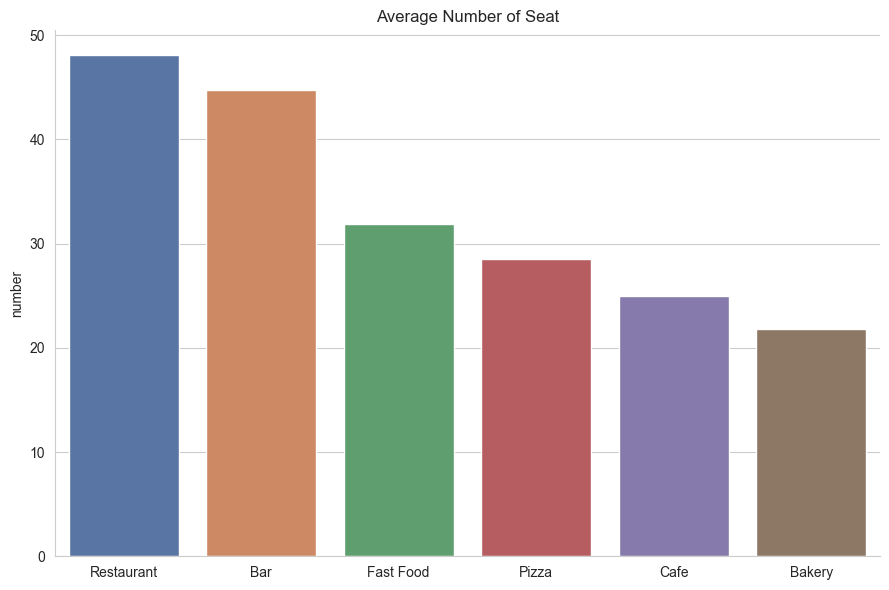

In [28]:
# Grafik bar seaborn
seat = sns.catplot(data=seat_avg_table, x='object_type', y='number', kind='bar', palette='deep', height=6, aspect=1.5)
seat.set(title= 'Average Number of Seat', xlabel='')

Secara keseluruhan jenis usaha Restaurant memiliki jumlah kursi terbanyak dan Bakery paling sedikit.

In [29]:
seat_avg_table

,object_type,number
5,Restaurant,48.05
1,Bar,44.77
3,Fast Food,31.84
4,Pizza,28.55
2,Cafe,25.00
0,Bakery,21.77


3 jenis usaha yang memiliki jumlah kursi terbanyak adalah Restaurant, Bar dan Fast Food.

In [30]:
# Export data ke excel
seat_avg_table.to_excel(r'C:\Users\vidop\Documents\Practicum\Sprint 9\Export\seat_avg_total.xlsx',
                    index=False)

## Rata-rata Jumlah Kursi Jenis Usaha Waralaba

In [31]:
# Membuat tabel jumlah rata-rata kursi tiap jenis usaha waralaba
f_seat_avg_table = round(data[data['chain']==True].pivot_table(index='object_type',
                                                               values='number', aggfunc='mean'),2).reset_index()

f_seat_avg_table = f_seat_avg_table.sort_values(by='number', ascending=False)

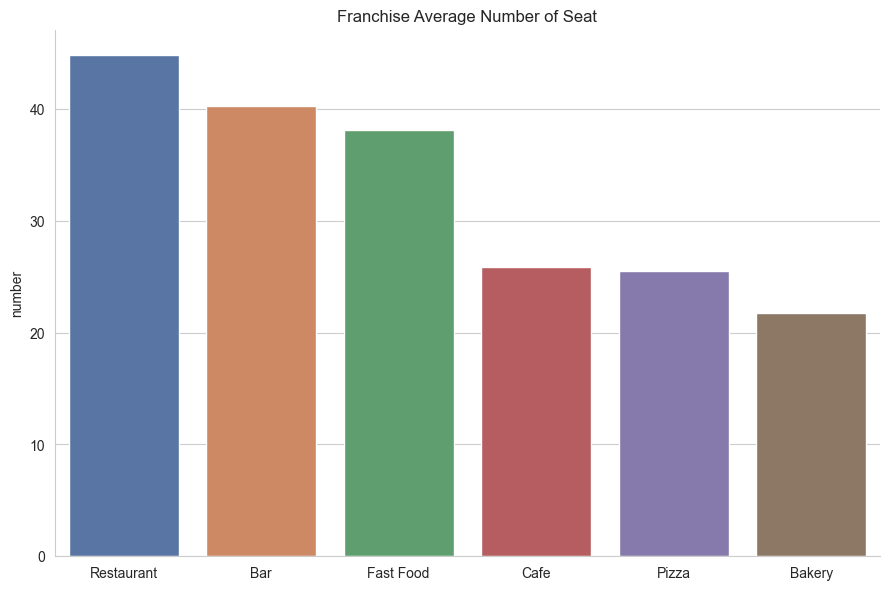

In [32]:
# Grafik bar seaborn
seat = sns.catplot(data=f_seat_avg_table, x='object_type', y='number', kind='bar', palette='deep', height=6, aspect=1.5)
seat.set(title= 'Franchise Average Number of Seat', xlabel='')

Pada bisnis waralaba jenis usaha Restaurant memiliki jumlah kursi terbanyak dan Bakery paling sedikit.

In [33]:
f_seat_avg_table

,object_type,number
5,Restaurant,44.86
1,Bar,40.26
3,Fast Food,38.09
2,Cafe,25.92
4,Pizza,25.53
0,Bakery,21.77


Pada bisnis waralaba 3 jenis usaha yang memiliki jumlah kursi terbanyak adalah Restaurant, Bar dan Fast Food.

In [34]:
# Export data ke excel
f_seat_avg_table.to_excel(r'C:\Users\vidop\Documents\Practicum\Sprint 9\Export\f_seat_avg.xlsx',
                    index=False)

## Rata-rata Jumlah Kursi Jenis Usaha Non-Waralaba

In [35]:
# Membuat tabel jumlah rata-rata kursi tiap jenis usaha nonwaralaba
nf_seat_avg_table = round(data[data['chain']==False].pivot_table(index='object_type',
                                                                 values='number', aggfunc='mean'),2).reset_index()

nf_seat_avg_table = nf_seat_avg_table.sort_values(by='number', ascending=False)

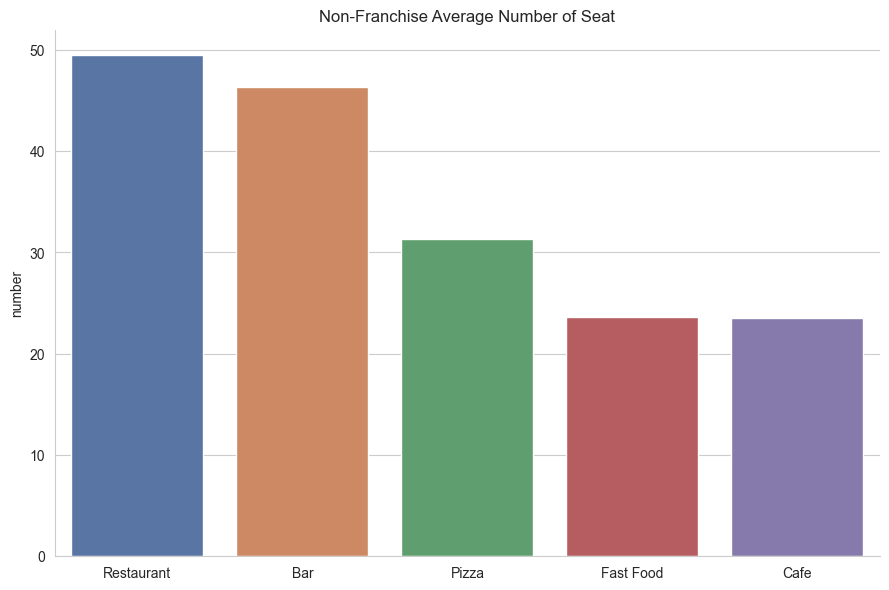

In [36]:
# Grafik bar seaborn
seat = sns.catplot(data=nf_seat_avg_table, x='object_type', y='number', kind='bar', palette='deep', height=6, aspect=1.5)
seat.set(title= 'Non-Franchise Average Number of Seat', xlabel='')

Pada bisnis non-waralaba jenis usaha Restaurant memiliki jumlah kursi terbanyak dan cafe paling sedikit.

In [37]:
nf_seat_avg_table

,object_type,number
4,Restaurant,49.52
0,Bar,46.38
3,Pizza,31.33
2,Fast Food,23.63
1,Cafe,23.56


Pada bisnis non-waralaba 3 jenis usaha yang memiliki jumlah terbanyak adalah Restaurant, Bar dan Pizza.

In [38]:
# Export data ke excel
nf_seat_avg_table.to_excel(r'C:\Users\vidop\Documents\Practicum\Sprint 9\Export\nf_seat_avg.xlsx',
                    index=False)

## Lokasi Usaha

### Memisahkan Nama Jalan dari Alamat (address)

In [39]:
# Merubah semua huruf alphabet menjadi uppercase kolom address
data['address'] = [i.upper() for i in data['address']]

Untuk menghindari penulisan yang tidak seragam, semua huruf dijadikan uppercase.

In [40]:
# Membuat fungsi untuk mengambil nama jalan dengan library usaddress
def extract(row):
    try:
        parsed = usaddress.tag(row)[0]
        street_name = parsed.get('StreetName', row)
        return street_name
    except usaddress.RepeatedLabelError as e:
        return e.original_string

# Aplikasi fungsi ke kolom street_name
data['street_name'] = data['address'].apply(extract)

In [41]:
# Cek nama jalan apakah sudah seragam
with pd.option_context('display.max_rows', None,):
   print(data.groupby('street_name')['address'].count())

street_name
1/4 FAIR PARK                             1
103                                       1
1033 1/2 LOS ANGELES ST                   1
103RD                                     9
10TH                                      1
110 E 9TH ST ST B LOB#2                   1
11TH                                     10
120TH                                     3
123 ASTRONAUT E S ONIZUKA ST # 101C       1
123 ASTRONAUT E S ONIZUKA ST STE 203      2
123 ASTRONAUT E. S. ONIZUKA ST            2
123 E ASTRONAUT E S ONIZUKA ST #108       1
12TH                                     34
15TH                                      2
16TH                                      1
17TH                                      1
18TH                                      1
19                                        1
1ST                                     122
2                                         1
23RD                                      2
26                                        2
27TH                

Tampaknya terdapat beberapa nama jalan yang masih tidak seragam, nama jalan ini akan di eliminasi menggunakan regex.

In [42]:
# Eliminasi huruf dan karakter dengan regex
pattern = r'[.]|^\d+\s|\d/\d\s|\b\sST\b.*|\bE\s\b|\bS\s\b|\b\sPLAZA\b.*|\b\sPLZ\b'

data['street_name'] = [re.sub(pattern, '',i) for i in data['street_name']]

In [43]:
# Cek ulang nama jalan apakah sudah seragam
with pd.option_context('display.max_rows', None,):
   print(data.groupby('street_name')['address'].count())

street_name
103                            1
103RD                          9
10TH                           1
11TH                          10
120TH                          3
12TH                          34
15TH                           2
16TH                           1
17TH                           1
18TH                           1
19                             1
1ST                          123
2                              1
23RD                           2
26                             2
27TH                           1
28                             1
28TH                           1
2ND                           54
34TH                           5
37TH                           1
3RD                          262
40                             7
42ND                           1
45                             1
48TH                           4
4TH                           31
50                             4
505                            1
54TH                           

Setelah di eliminasi nama jalan (street_name) tampak seragam dan bisa dikelompokkan.

### Top 10 Lokasi Usaha

In [44]:
# Membuat tabel untuk menghitung jumlah tempat usaha per jalan.
location = data.pivot_table(index='street_name', columns='chain', 
                            values='address', aggfunc='count', margins=True)[:-1].fillna(0).reset_index()

location.columns = ['street_name', 'franchise', 'nonfranchise', 'total']

location[['franchise', 'nonfranchise']] = location[['franchise', 'nonfranchise']].astype(int)

**Top 10 lokasi waralaba & non-waralaba**

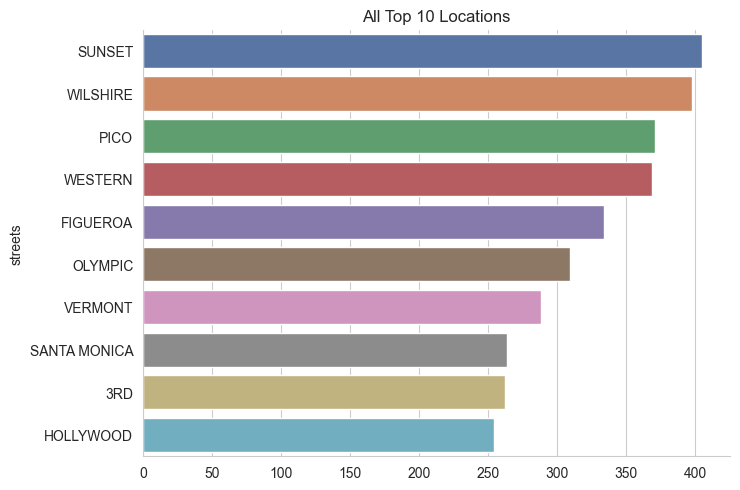

In [45]:
# Grafik top 10 lokasi usaha
top_ten_all = location[['street_name', 'total']].sort_values(by='total', ascending=False).head(10)

top_ten_all_graph = sns.catplot(data=top_ten_all, y='street_name', x='total', kind='bar', palette='deep', aspect = 1.5)
top_ten_all_graph.set(title = 'All Top 10 Locations', xlabel='', ylabel='streets')

Jalan SUNSET memiliki jumlah terbanyak tempat usaha secara keseluruhan.

In [46]:
top_ten_all

,street_name,total
410,SUNSET,405
460,WILSHIRE,398
352,PICO,371
450,WESTERN,369
175,FIGUEROA,334
335,OLYMPIC,309
434,VERMONT,288
382,SANTA MONICA,264
21,3RD,262
221,HOLLYWOOD,254


Jalan SUNSET menempati posisi pertama dengan 405 tempat usaha, dan jalan HOLLYWOOD di posisi ke 10 dengan 254 tempat usaha.

In [47]:
# Export data ke excel
top_ten_all.to_excel(r'C:\Users\vidop\Documents\Practicum\Sprint 9\Export\top10_loc.xlsx',
                    index=False)

**Top 10 lokasi waralaba**

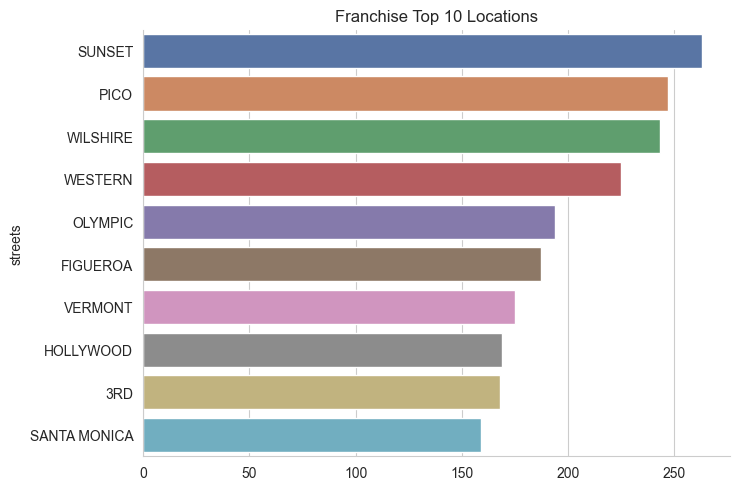

In [48]:
# Grafik top 10 lokasi usaha waralaba
top_ten_f = location[['street_name', 'franchise']].sort_values(by='franchise', ascending=False).head(10)

top_ten_f_graph = sns.catplot(data=top_ten_f, y='street_name', x='franchise', kind='bar', palette='deep', aspect = 1.5)
top_ten_f_graph.set(title = 'Franchise Top 10 Locations', xlabel='', ylabel='streets')

Jalan SUNSET memiliki jumlah terbanyak tempat usaha waralaba.

In [49]:
top_ten_f

,street_name,franchise
410,SUNSET,263
352,PICO,247
460,WILSHIRE,243
450,WESTERN,225
335,OLYMPIC,194
175,FIGUEROA,187
434,VERMONT,175
221,HOLLYWOOD,169
21,3RD,168
382,SANTA MONICA,159


Jalan SUNSET menempati posisi pertama dengan 263 tempat usaha waralaba, dan jalan SANTA MONICA di posisi ke 10 dengan 159 tempat usaha.

In [50]:
# Export data ke excel
top_ten_f.to_excel(r'C:\Users\vidop\Documents\Practicum\Sprint 9\Export\top10_loc_f.xlsx',
                    index=False)

**Top 10 lokasi non-waralaba**

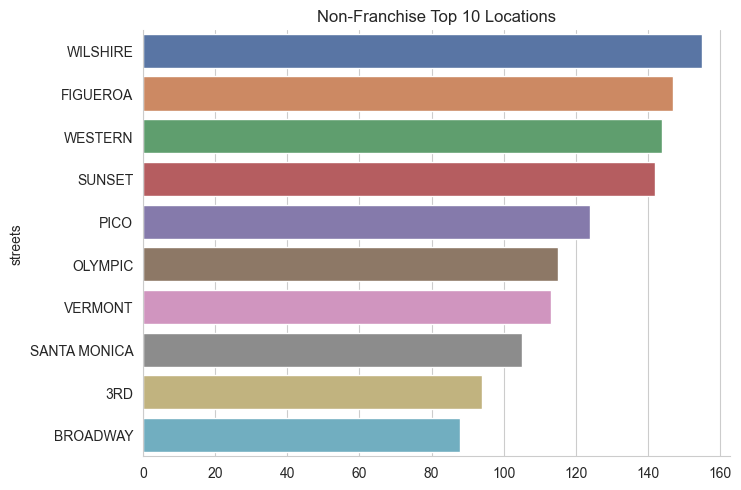

In [51]:
# Grafik top 10 lokasi usaha non-waralaba
top_ten_nf = location[['street_name', 'nonfranchise']].sort_values(by='nonfranchise', ascending=False).head(10)

top_ten_nf_graph = sns.catplot(data=top_ten_nf, y='street_name', x='nonfranchise', kind='bar', palette='deep', aspect = 1.5)
top_ten_nf_graph.set(title = 'Non-Franchise Top 10 Locations', xlabel='', ylabel='streets')

Jalan WILSHIRE memiliki jumlah terbanyak tempat usaha non-waralaba.

In [52]:
top_ten_nf

,street_name,nonfranchise
460,WILSHIRE,155
175,FIGUEROA,147
450,WESTERN,144
410,SUNSET,142
352,PICO,124
335,OLYMPIC,115
434,VERMONT,113
382,SANTA MONICA,105
21,3RD,94
94,BROADWAY,88


Jalan WILSHIRE menempati posisi pertama dengan 155 tempat usaha non-waralaba, dan jalan BROADWAY di posisi ke 10 dengan 88 tempat usaha.

In [53]:
# Export data ke excel
top_ten_nf.to_excel(r'C:\Users\vidop\Documents\Practicum\Sprint 9\Export\top10_loc_nf.xlsx',
                    index=False)

### Lokasi dengan 1 Tempat Usaha

In [54]:
# Irisan data yang berisi nama jalan dengan 1 tempat usaha
location_1 = location[['street_name', 'total']].query('total <2')

location_1.head()

,street_name,total
0,103,1
2,10TH,1
7,16TH,1
8,17TH,1
9,18TH,1


List data nama jalan yang hanya berisi 1 tempat usaha.

In [55]:
# Menghitung jumlah jalan dengan 1 tempat usaha.

print('Terdapat', len(location_1), 'jalan dengan 1 tempat usaha.')

Terdapat 185 jalan dengan 1 tempat usaha.


## Distribusi Jumlah Kursi pada Lokasi Populer

Distribusi jumlah kursi akan dilihat dari Top 10 lokasi terpopuler.

In [56]:
# Membuat list nama jalan top 10 kedua jenis bisnis
street_list = top_ten_all.set_index('street_name').index

# Irisan data dengan jalan top 10
data_filt = data[data['street_name'].isin(street_list)]

[Text(0.5, 1.0, 'Number of Seat Distribution'), Text(0.5, 0, 'Number of Seat')]

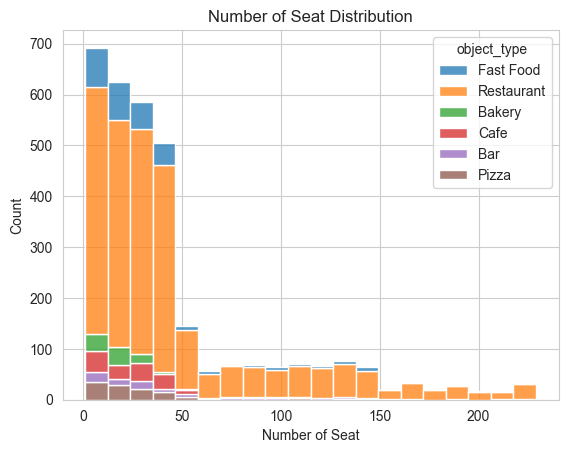

In [57]:
# Grafik histogram
seat = sns.histplot(data=data_filt, x='number', hue='object_type', multiple='stack', bins=20)
seat.set(title = 'Number of Seat Distribution', xlabel='Number of Seat')

Jumlah kursi pada tempat usaha di lokasi terpopuler sekitar 1-50 kursi per tempat.

## Kesimpulan

Secara keseluruhan, jenis usaha Restaurant berjumlah paling banyak dan Bakery berjumlah paling sedikit.

Pada bisnis waralaba, jenis usaha Restaurant berjumlah paling banyak dan Bar paling sedikit.

Pada bisnis non-waralaba, jenis usaha Restaurant berjumlah paling banyak dan Pizza paling sedikit.

Jika dilihat dari kepemilikan bisnis, pada jenis usaha Bakery memiliki kepemilikian bisnis waralaba 100%, tidak ada kepemilikan non-waralaba di jenis usaha ini. Dan pada jenis usaha Bar memiliki persentase kepemilikan bisnis waralaba terkecil sebesar 26%.

Secara keseluruhan jenis usaha, bisnis waralaba memiliki jumlah lokasi dan kursi lebih banyak dari bisnis non-waralaba.

Secara keseluruhan, rata-rata jumlah kursi terbanyak pada jenis usaha Restaurant dan Bakery paling sedikit.

Pada bisnis waralaba, rata-rata jumlah kursi terbanyak pada jenis usaha Restaurant dan Bakery paling sedikit.

Pada bisnis non-waralaba, rata-rata jumlah kursi terbanyak pada jenis usaha Restaurant dan cafe paling sedikit.

Secara keseluruhan, jalan SUNSET menempati posisi pertama dengan 405 tempat usaha, dan jalan HOLLYWOOD di posisi ke 10 dengan 254 tempat usaha.

Pada bisnis waralaba, jalan SUNSET menempati posisi pertama dengan 263 tempat usaha waralaba, dan jalan SANTA MONICA di posisi ke 10 dengan 159 tempat usaha.

Pada bisnis non-waralaba, jalan WILSHIRE menempati posisi pertama dengan 155 tempat usaha non-waralaba, dan jalan BROADWAY di posisi ke 10 dengan 88 tempat usaha.

Terdapat juga jalan dengan hanya 1 tempat usaha sebanyak 185 jalan.

Pada 10 lokasi terpopuler, kebanyakan jumlah kursi per tempat usaha sekitar 1-50 kursi.








# Kesimpulan

Dari data ini digunakan untuk melihat bisnis makanan yang ada di LA.

**Informasi yang terdapat pada data :**

 - object_name — nama usaha.
 - chain — TRUE = Waralaba, FALSE = Non Waralaba.
 - object_type — jenis usaha.
 - address — alamat.
 - number — jumlah kursi.

**Perbaikan pada data :**

 1. Menghapus data chain dengan nilai na.

**Penambahan informasi pada data :**

 1. Memisahkan nama jalan dengan menggunakan library usadress.
 2. Menyeragamkan nama jalan dengan mengeliminasi huruf dan karakter menggunakan regex.


**Jenis usaha secara keseluruhan**

In [58]:
btype_table

,business_type,count
0,Restaurant,7253
1,Fast Food,1066
2,Cafe,435
3,Pizza,319
4,Bar,292
5,Bakery,283


Secara keseluruhan jenis usaha Restaurant berjumlah paling banyak dan Bakery berjumlah paling sedikit.
3 Jenis usaha terbanyak adalah Restaurant, Fast Food dan Cafe.

**Jenis usaha waralaba**


In [59]:
f_btype_table

,business_type,count
0,Restaurant,2292
1,Fast Food,605
2,Bakery,283
3,Cafe,266
4,Pizza,153
5,Bar,77


Pada bisnis Waralaba, jenis usaha Restaurant berjumlah paling banyak dan Bar paling sedikit. 3 jenis usaha waralaba terbanyak adalah Restaurant, Fast Food dan Bakery.

**Jenis usaha non-waralaba**


In [60]:
nf_btype_table

,business_type,count
0,Restaurant,4961
1,Fast Food,461
2,Bar,215
3,Cafe,169
4,Pizza,166


Pada bisnis non-waralaba, jenis usaha Restaurant berjumlah paling banyak dan Pizza paling sedikit. 3 jenis usaha waralaba terbanyak adalah Restaurant, Fast Food dan Bar.

**Perbandingan kepemilikan jenis usaha waralaba dan non-waralaba**

In [61]:
comp_table

,business_type,count_franchise,count_non_franchise,total,franchise_pct
2,Bakery,283,0,283,100.0
3,Cafe,266,169,435,61.0
1,Fast Food,605,461,1066,57.0
4,Pizza,153,166,319,48.0
0,Restaurant,2292,4961,7253,32.0
5,Bar,77,215,292,26.0


Jenis usaha Bakery memiliki kepemilikian bisnis waralaba 100%, tidak ada kepemilikan non-waralaba di jenis usaha ini. Sedangkan jenis usaha Bar memiliki persentase kepemilikan bisnis waralaba terkecil sebesar 26%.

**Ciri-ciri bisnis waralaba**

In [62]:
loc_seat_avg

,chain,avg_location,avg_seat
0,False,1.00,46.40
1,True,1.35,53.39


Secara keseluruhan jenis usaha, bisnis waralaba memiliki jumlah lokasi dan kursi lebih banyak daripada bisnis non-waralaba.

**Rata-rata jumlah kursi secara keseluruhan**

In [63]:
seat_avg_table

,object_type,number
5,Restaurant,48.05
1,Bar,44.77
3,Fast Food,31.84
4,Pizza,28.55
2,Cafe,25.00
0,Bakery,21.77


Secara keseluruhan jenis usaha Restaurant memiliki jumlah kursi terbanyak dan Bakery paling sedikit. 3 jenis usaha yang memiliki jumlah kursi terbanyak adalah Restaurant, Bar dan Fast Food.

**Rata-rata jumlah kursi jenis usaha waralaba**

In [64]:
f_seat_avg_table

,object_type,number
5,Restaurant,44.86
1,Bar,40.26
3,Fast Food,38.09
2,Cafe,25.92
4,Pizza,25.53
0,Bakery,21.77


Pada bisnis waralaba jenis usaha Restaurant memiliki jumlah kursi terbanyak dan Bakery paling sedikit. 3 jenis usaha yang memiliki jumlah kursi terbanyak adalah Restaurant, Bar dan Fast Food.

**Rata-rata jumlah kursi jenis usaha non-waralaba**

In [65]:
nf_seat_avg_table

,object_type,number
4,Restaurant,49.52
0,Bar,46.38
3,Pizza,31.33
2,Fast Food,23.63
1,Cafe,23.56


Pada bisnis non-waralaba jenis usaha Restaurant memiliki jumlah kursi terbanyak dan cafe paling sedikit. 3 jenis usaha yang memiliki jumlah terbanyak adalah Restaurant, Bar dan Pizza.

**Top 10 lokasi usaha secara keseluruhan**

In [66]:
top_ten_all

,street_name,total
410,SUNSET,405
460,WILSHIRE,398
352,PICO,371
450,WESTERN,369
175,FIGUEROA,334
335,OLYMPIC,309
434,VERMONT,288
382,SANTA MONICA,264
21,3RD,262
221,HOLLYWOOD,254


Jalan SUNSET menempati posisi pertama dengan 405 tempat usaha, dan jalan HOLLYWOOD di posisi ke 10 dengan 254 tempat usaha.

**Top 10 lokasi usaha waralaba**

In [67]:
top_ten_f

,street_name,franchise
410,SUNSET,263
352,PICO,247
460,WILSHIRE,243
450,WESTERN,225
335,OLYMPIC,194
175,FIGUEROA,187
434,VERMONT,175
221,HOLLYWOOD,169
21,3RD,168
382,SANTA MONICA,159


Jalan SUNSET menempati posisi pertama dengan 263 tempat usaha waralaba, dan jalan SANTA MONICA di posisi ke 10 dengan 159 tempat usaha.

**Top 10 lokasi usaha non-waralaba**

In [68]:
top_ten_nf

,street_name,nonfranchise
460,WILSHIRE,155
175,FIGUEROA,147
450,WESTERN,144
410,SUNSET,142
352,PICO,124
335,OLYMPIC,115
434,VERMONT,113
382,SANTA MONICA,105
21,3RD,94
94,BROADWAY,88


Jalan WILSHIRE menempati posisi pertama dengan 155 tempat usaha non-waralaba, dan jalan BROADWAY di posisi ke 10 dengan 88 tempat usaha.


Selain 10 jalan terpopuler juga terdapat 1 jalan dengan 1 tempat usaha sebanyak 185 jalan di LA.

Pada saat melihat jumlah kursi pada tempat usaha di 10 lokasi usaha terpopuler secara keseluruhan, kebanyakan tempat usaha memiliki 1-50 kursi per tempat.

Presentasi : https://drive.google.com/file/d/1hbrQEbmdkXovVN9GHN7W8-IH2z6NlQ5-/view?usp=sharing